# Importing modules and setting parameters 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8) 
sns.set('talk', rc={'figure.figsize': (12, 8)})

# Data cleaning  and  analysis 

In [2]:
df = pd.read_csv('data/avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
# look for missing values 
df.isna().sum() 

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No missing values, that's great 

In [4]:
# deletion of variables that are not relevant for further analysis   
df.info()
df.drop(['XLarge Bags', 'Large Bags', 'Small Bags', '4046', '4225', '4770', 'Unnamed: 0'], axis = 1, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
# reprocessing of columns  
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.month 
df.rename(columns={'Date': 'Month'}, inplace=True)

We can now perform basic statistical analysis 

In [6]:
df.describe()

,Month,AveragePrice,Total Volume,Total Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,18249.000000
mean,6.177215,1.405978,8.506440e+05,2.396392e+05,2016.147899
std,3.534130,0.402677,3.453545e+06,9.862424e+05,0.939938
min,1.000000,0.440000,8.456000e+01,0.000000e+00,2015.000000
25%,3.000000,1.100000,1.083858e+04,5.088640e+03,2015.000000
50%,6.000000,1.370000,1.073768e+05,3.974383e+04,2016.000000
75%,9.000000,1.660000,4.329623e+05,1.107834e+05,2017.000000
max,12.000000,3.250000,6.250565e+07,1.937313e+07,2018.000000


- The price of avocado is between  0.44 \\$ and 3.25 \\$
- On average, the annual sales of avocado amount to 850644 \\$

In [7]:
# categorial variables 
df.describe(exclude = (['float64', 'int64']))

,type,region
count,18249,18249
unique,2,54
top,conventional,Albany
freq,9126,338


- The conventiennel avocado is the most sold 
- In our sample, albany is the country(city) that sells the most avocados   

C:\Users\ghiles\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

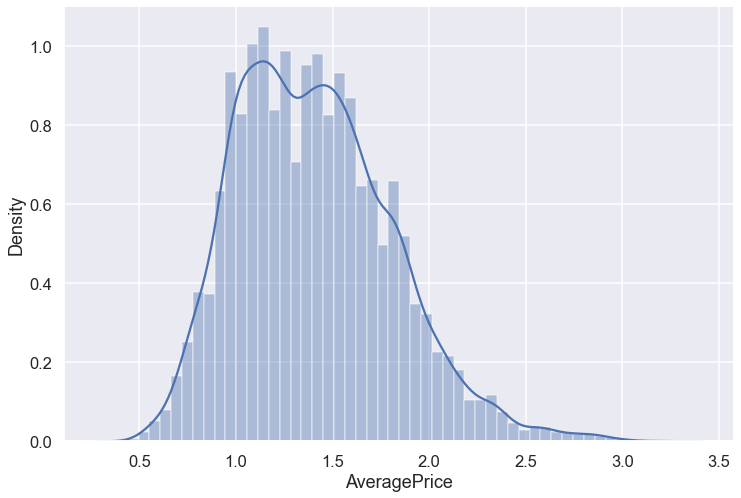

In [8]:
# let's look at the price 
sns.distplot(df['AveragePrice'])

<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

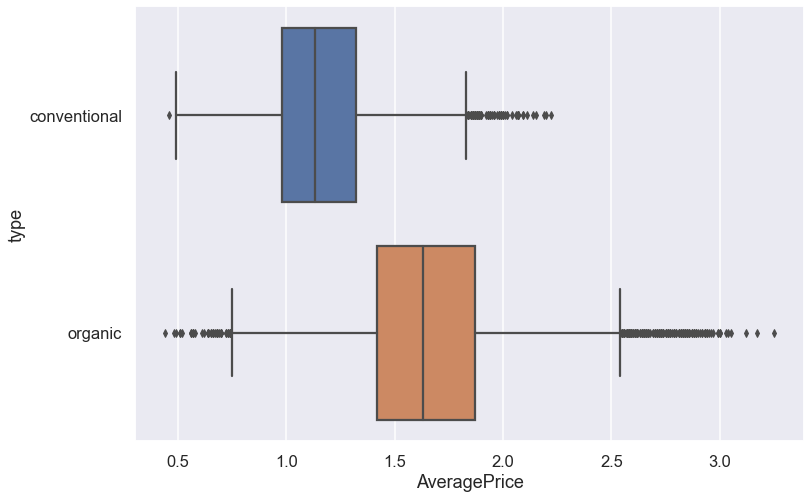

In [9]:
sns.boxplot(y="type", x="AveragePrice", data=df)

C:\Users\ghiles\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

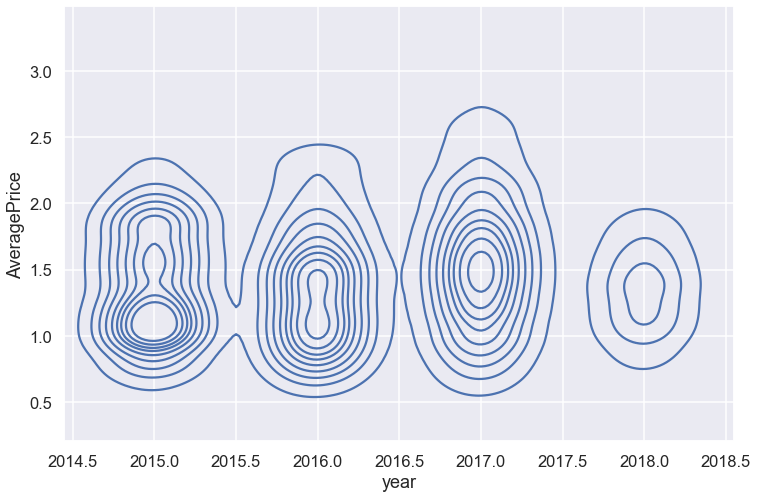

In [10]:
sns.kdeplot(
    df['year'], 
    df['AveragePrice'], 
)

In [11]:
df_year = df.pivot_table(
    values='AveragePrice', 
    index='year', 
    aggfunc='mean'
)
df_year

,AveragePrice
year,
2015,1.375590
2016,1.338640
2017,1.515128
2018,1.347531


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

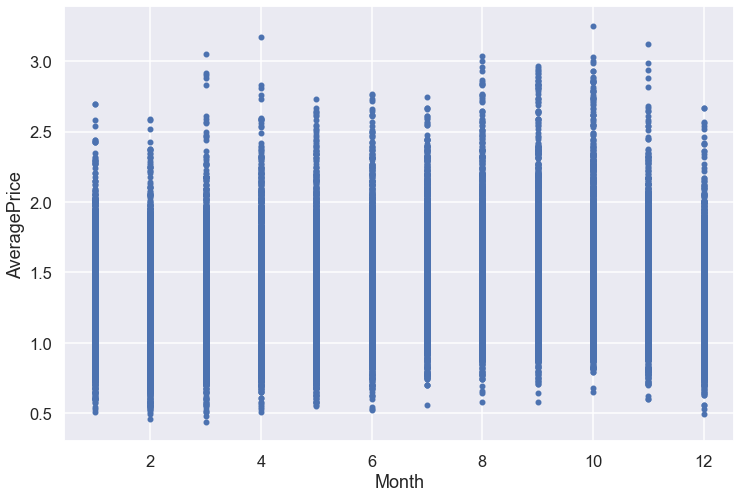

In [12]:
df.plot.scatter('Month', 'AveragePrice')

In [13]:
df_month = df.pivot_table(
    values='AveragePrice', 
    index='Month', 
    aggfunc='mean'
)
df_month.sort_values(by = ['AveragePrice'])

,AveragePrice
Month,
2,1.274387
1,1.311019
12,1.331112
3,1.332255
5,1.346601
4,1.374380
6,1.408964
11,1.455563
7,1.462077


- We notice quite clearly that the price is normally distributed 
- The organic avocado is more expensive than the conventional avocado
- 2017 was the year when avocados were the most expensive 
- avocados are the most expensive in October and the cheapest in February 

C:\Users\ghiles\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ghiles\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ghiles\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


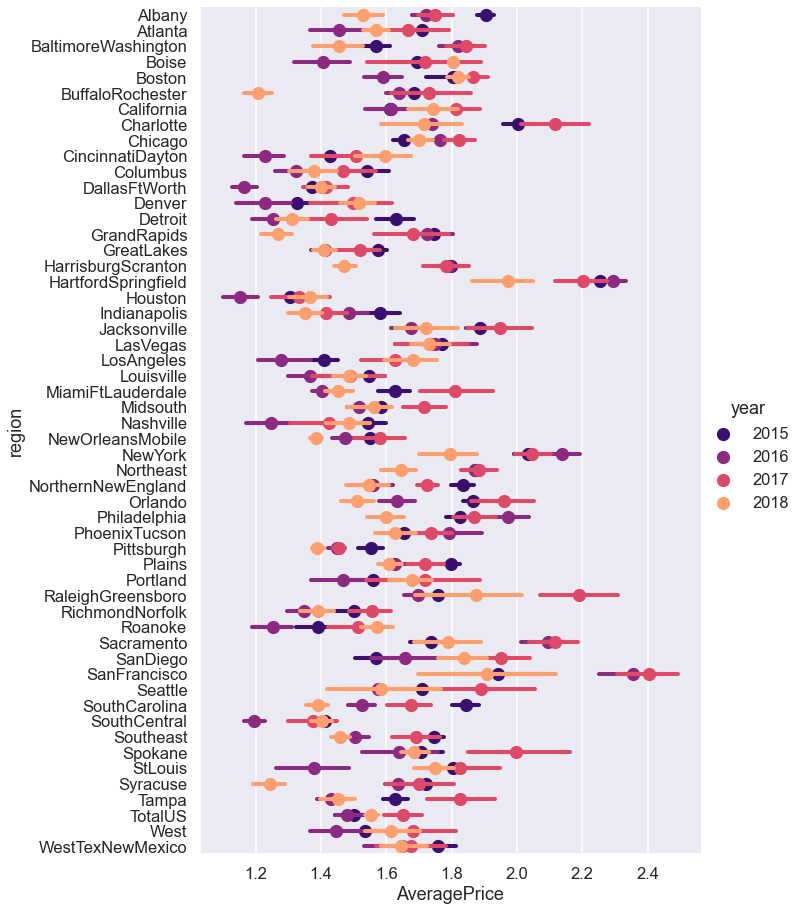

In [14]:
## let's take a look at the types of avocado
organic_data = df['type'] =='organic'
g = sns.factorplot('AveragePrice','region',data=df[organic_data],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

C:\Users\ghiles\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ghiles\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ghiles\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


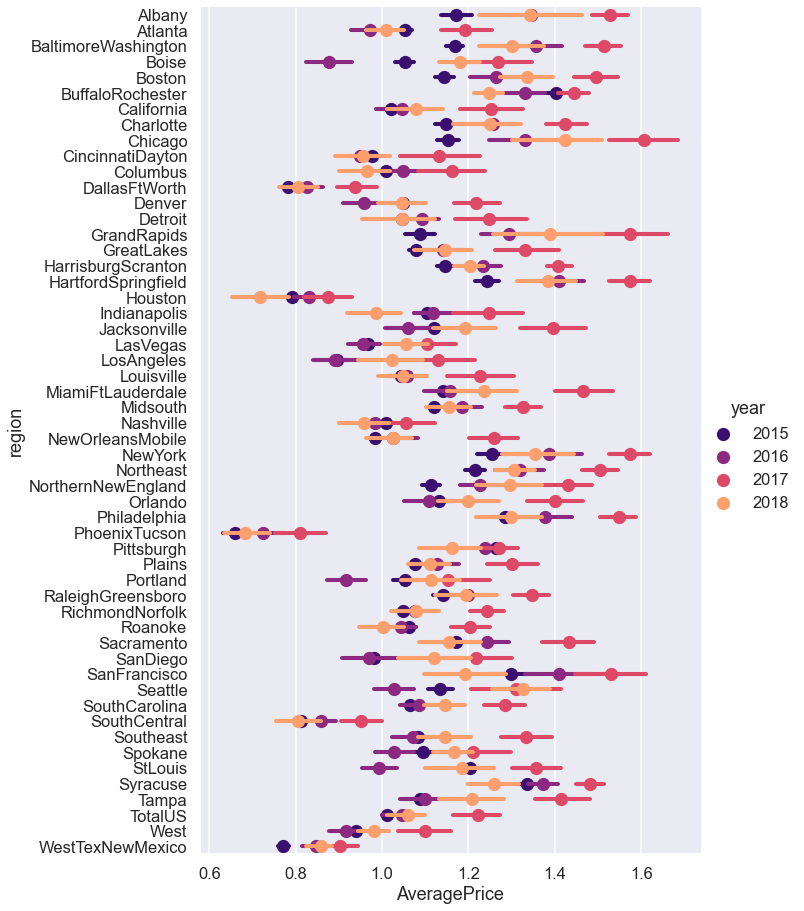

In [15]:
organic_data = df['type'] =='conventional'
g = sns.factorplot('AveragePrice','region',data=df[organic_data],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

- For organic avocados, they sold the most in san Fransisco for the year 2017 
- For conventional avocados, they sold the most in Chicago for the year 2017 

<AxesSubplot:>

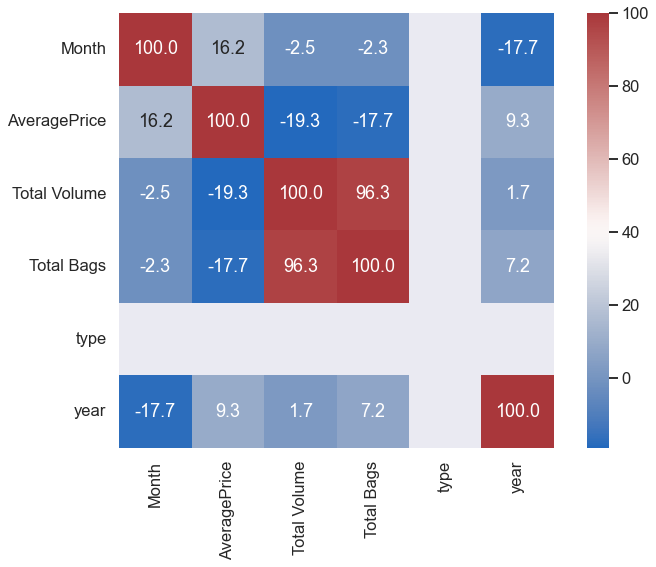

In [20]:
# correlation matrix 
sns.heatmap(
    100*df.corr(), 
    square=True, 
    annot=True, 
    fmt='.1f', 
    cmap=sns.cm.vlag )

- There is a negative correlation between the average price of avocado and the total volume of sales 
- Moreover, the sales volume is strongly correlated with the number of bags, so it is a bad idea to include both in our regression    

C:\Users\ghiles\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

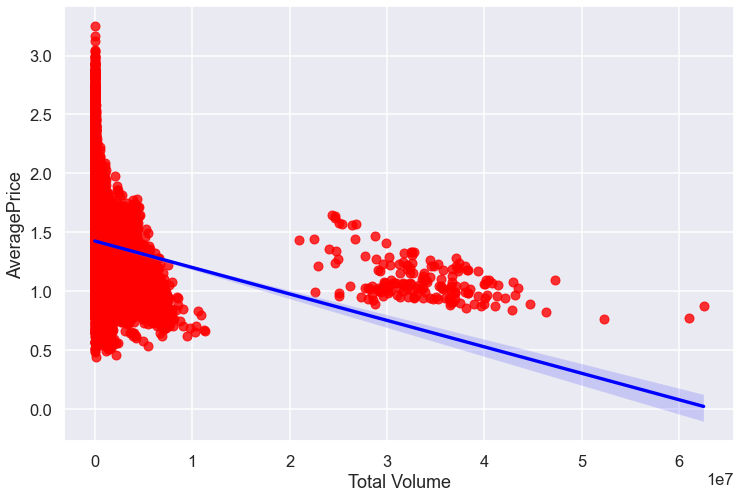

In [21]:
sns.regplot(
    df['Total Volume'], df['AveragePrice'] , 
    scatter_kws = {'color': 'red'}, line_kws = {'color': 'blue'} )